In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [8]:
#Setup
K = np.loadtxt('Glyp/K.txt')
im1 = cv2.imread('Glyp/sequence/000001.png')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2 = cv2.imread('Glyp/sequence/000002.png')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im3 = cv2.imread('Glyp/sequence/000003.png')
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)



In [30]:
# Exercise 11.1
sift = cv2.SIFT_create(2000)
kp1, des1 = sift.detectAndCompute(im1,None)
kp2, des2 = sift.detectAndCompute(im2,None)
kp3, des3 = sift.detectAndCompute(im3,None)


kp1 = np.array([k.pt for k in kp1])
kp2 = np.array([k.pt for k in kp2])
kp3 = np.array([k.pt for k in kp3])

bf = cv2.BFMatcher()

matches1_2 = bf.match(des1,des2)
matches1_2 = sorted(matches1_2, key = lambda x:x.distance)

matches1_2 = np.array([(m.queryIdx, m.trainIdx) for m in matches1_2])

matches2_3 = bf.match(des2,des3)
matches2_3 = sorted(matches2_3, key = lambda x:x.distance)

matches2_3 = np.array([(m.queryIdx, m.trainIdx) for m in matches2_3])

In [29]:
# Exercises 11.2

E1_2, mask = cv2.findEssentialMat(kp1[matches1_2[:,0]],kp2[matches1_2[:,1]],K,method=cv2.RANSAC)
retval, R2,t2,mask = cv2.recoverPose(E1_2,kp1[matches1_2[:,0]],kp2[matches1_2[:,1]],K)
idx = [i for i, e in enumerate(mask) if e != 0]
matches1_2 = matches1_2[idx]


In [31]:
# Exercise 11.3

_, idx12, idx23 = np.intersect1d(matches1_2[:,1],matches2_3[:,0],return_indices = True)



In [64]:
# Exercise 11.4

P1 = K@np.hstack([np.identity(3), np.array([[0,0,0]]).T])
P2 = K@np.hstack([R2,t2])
Q = cv2.triangulatePoints(P1,P2,kp1[matches1_2[idx12,0]].T,kp2[matches2_3[idx23,0]].T)
Q = Q[:-1,:]/Q[-1,:]

(3, 1276)


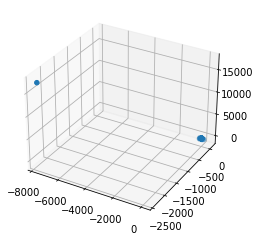

In [65]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Q[0,:],Q[1,:],Q[2,:])

1276
